In [ ]:
import numpy as np

n = int(input("Enter the number of nodes: "))
m = int(input("Enter the number of edges: "))

adj_matrix = np.zeros((n, n))

print("Enter edges in format: from_node to_node (0-indexed)")

for _ in range(m):
    from_node, to_node = map(int, input().split())

    adj_matrix[to_node, from_node] = 1

alpha = 0.85
max_iter = 100
tol = 1e-6

out_degree = adj_matrix.sum(axis=0)

dangling_nodes = (out_degree == 0)

pr = np.ones(n) / n

M = np.zeros((n, n))
for j in range(n):
    if out_degree[j] > 0:
        M[:, j] = adj_matrix[:, j] / out_degree[j]
    else:
        M[:, j] = 1.0 / n

for i in range(max_iter):
    pr_new = alpha * (M @ pr) + (1 - alpha) / n

    if np.linalg.norm(pr_new - pr, 1) < tol:
        break
    pr = pr_new

print("\nPageRank scores:")
for i, score in enumerate(pr):
    print(f"Node {i}: {score:.6f}")



Enter the number of nodes: 4
Enter the number of edges: 5
Enter edges in format: from_node to_node (0-indexed)
0 1
1 2
2 1
2 0
3 0

PageRank scores:
Node 0: 0.222491
Node 1: 0.379734
Node 2: 0.360274
Node 3: 0.037500


Enter the number of nodes: 4
Enter the number of edges: 4
Enter edges in format: from_node to_node (0-indexed)
0 1
1 2
2 0
2 3

PageRank Scores:
Node 0: 0.213762
Node 1: 0.264622
Node 2: 0.307853
Node 3: 0.213762


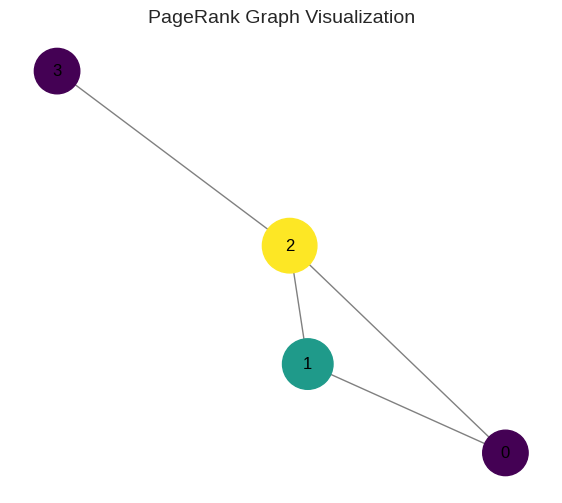

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Input number of nodes and edges
n = int(input("Enter the number of nodes: "))
m = int(input("Enter the number of edges: "))

# Initialize adjacency matrix
adj_matrix = np.zeros((n, n))

print("Enter edges in format: from_node to_node (0-indexed)")

for _ in range(m):
    from_node, to_node = map(int, input().split())
    adj_matrix[to_node, from_node] = 1  # directed edge

# PageRank parameters
alpha = 0.85
max_iter = 100
tol = 1e-6

# Compute out-degrees
out_degree = adj_matrix.sum(axis=0)

# Identify dangling nodes
dangling_nodes = (out_degree == 0)

# Initialize PageRank values
pr = np.ones(n) / n

# Transition probability matrix
M = np.zeros((n, n))
for j in range(n):
    if out_degree[j] > 0:
        M[:, j] = adj_matrix[:, j] / out_degree[j]
    else:
        M[:, j] = 1.0 / n  # handle dangling nodes

# Power iteration method
for i in range(max_iter):
    pr_new = alpha * (M @ pr) + (1 - alpha) / n
    if np.linalg.norm(pr_new - pr, 1) < tol:
        break
    pr = pr_new

# Display PageRank scores
print("\nPageRank Scores:")
for i, score in enumerate(pr):
    print(f"Node {i}: {score:.6f}")

# --- Draw the graph ---
G = nx.DiGraph()

# Add edges
for i in range(n):
    for j in range(n):
        if adj_matrix[j, i] == 1:
            G.add_edge(i, j)

# Draw nodes sized by PageRank value
plt.figure(figsize=(7, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=[v * 5000 for v in pr], cmap=plt.cm.viridis, node_color=pr)
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=12, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=12, font_color="black")

plt.title("PageRank Graph Visualization", fontsize=14)
plt.axis("off")
plt.show()
